In [1]:
#import libraries
!pip install imutils
from pathlib import Path
import cv2
import numpy as np
import math
#import glob
from matplotlib import pyplot as plt
import argparse
import imutils
import os

You should consider upgrading via the 'c:\anconda\python.exe -m pip install --upgrade pip' command.


In [2]:
class sky_line():
    def crop_image(self, output_path,image,lines,name_image, edges):
        # Image contains sky, we will remove part of the sky from the image
        img_clone = image.copy()
        # Average line only
        avg_rho = np.mean([line[0][0] for line in lines])
        avg_theta = np.mean([line[0][1] for line in lines])
        self.plot_line(img_clone, avg_rho, avg_theta)
        cropped= image[int(avg_rho):,:]
        cv2.imwrite(output_path+ name_image,cropped)
        #self.show_image(image,edges,img_clone,cropped)
        
    def no_skyline(self, output_path, image, name_image):
        # When the image does not contain sky
        cv2.imwrite(output_path+ name_image,image)
        
    def show_image(self, image,edges,img_clone,cropped):
        # Output images to window
        cv2.imshow("Original", image)
        cv2.imshow("Edges", edges)
        cv2.imshow("SkyLine", img_clone)
        cv2.imshow("Cropping", cropped)
        cv2.waitKey()
        cv2.destroyAllWindows()

    def custom_canny(self, img,image, sigma=0.33):
        # compute the median of the single channel pixel intensities
        median_value = np.median(image)
        # apply automatic Canny edge detection using the computed median
        lower = int(max(0, (1.0 - sigma) * median_value))
        upper = int(min(255, (1.0 + sigma) * median_value))
        edged = cv2.Canny(img, lower, upper)
        return edged


    def plot_line(self, img, rho, theta):
        # Plots the line coming out of a Hough Line Transform
        a, b = math.cos(theta), math.sin(theta)
        x0, y0  = a * rho,  b * rho
        point1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        point2 = (int(x0 - 1000* (-b)), int(y0 - 1000 * (a)))
        cv2.line(img, point1, point2, (255, 0, 0), 3)
    
    def get_lines_sky(self, image):
        # Blur image and convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (3, 3), 0)
        # Use Canny edge detection to find edges
        edges = self.custom_canny(blurred, image)
        # define dilate
        dilated = cv2.dilate(edges, np.ones((3,3), dtype=np.uint8))
        # Use Hough Line Transform to get lines
        lines = cv2.HoughLines(dilated, 1, np.pi / 100, threshold = 232,  min_theta=np.pi / 3, max_theta=2 * np.pi / 3)
        return lines, edges
    
    def image_inspection(self, root_dir):
        for name_image in os.listdir(root_dir):
            image = cv2.imread(root_dir+name_image)
            lines, edges = self.get_lines_sky(image)
            if lines is not None:
                print('Found %s lines' % (len(lines)))
                # # Print all lines
                for line in lines:
                    for rho, theta in line:
                        self.plot_line(edges, rho, theta)
                self.crop_image(output_path,image,lines, name_image, edges)
            else:
                print('No Horizon Found')
                self.no_skyline(output_path, image, name_image)

    def show_cropping_image(self, original_image, cropping_image):
        # create figure
        fig = plt.figure(figsize=(18, 18))
        # setting values to rows and column variables
        rows, columns= 1, 2  
        # Adds a subplot at the 1st position
        fig.add_subplot(rows, columns, 1)

        # showing image
        plt.imshow(cv2.imread(original_image))
        plt.title("With sky")

        # Adds a subplot at the 2nd position
        fig.add_subplot(rows, columns, 2)

        # showing image
        plt.imshow(cv2.imread(cropping_image))
        plt.title("Without sky")
        cv2.waitKey()
        
    def rotation_image(self, image):
        # load the image from disk
        image = cv2.imread(image)
        # loop over the rotation angles again, this time ensuring
        # no part of the image is cut off
        for angle in np.arange(0, 360, 15):
            rotated = imutils.rotate_bound(image, angle)
            cv2.imshow("Rotated (Correct)", rotated)

Found 566 lines
Found 6 lines
Found 18 lines
Found 11 lines
Found 13 lines
Found 1 lines
Found 182 lines
Found 54 lines
Found 379 lines
Found 20 lines
Found 6 lines
Found 1 lines
Found 35 lines
Found 12 lines
No Horizon Found
No Horizon Found
Found 127 lines
Found 13 lines
Found 1 lines
Found 1 lines
Found 68 lines
Found 1 lines
Found 35 lines
Found 49 lines
Found 2 lines
Found 19 lines
Found 189 lines
No Horizon Found
Found 1011 lines


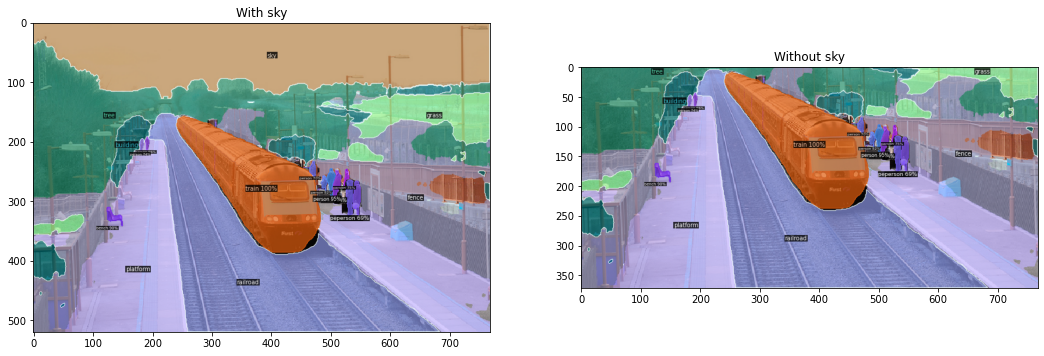

In [3]:
if __name__ == '__main__':
    # Paths to images
    root_dir ="panoptic_seg/"
    output_path = "cropping_data/"
    # Create object of class sky_line
    obj_sky_line=sky_line()
    obj_sky_line.image_inspection(root_dir)
    obj_sky_line.show_cropping_image('panoptic_seg/6.png', 'cropping_data/6.png')
    obj_sky_line.rotation_image('cropping_data/6.png')